In [1]:
#import needed libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data user_day
df1=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_day.csv', encoding='utf-8-sig', engine='python')
df1.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse


In [3]:
#read the data user_cpi
df2=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_cpi.csv', encoding='utf-8-sig', engine='python')
df2.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.26,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.00,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.26,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.26,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.26,My Lovely Horse


In [4]:
#merge the dataframes 
frames = [df1, df2]
df3= pd.merge(df1, df2, how="left", on=["player_id", "game"])
df3.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse,2019-09-15,Organic,0.00
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse,2019-08-02,Paid,0.26
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00


In [5]:
#select 'No Danger' game data
df4=df3.loc[df3['game'] == 'No Danger']
df4.sample(5)

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
1114472,49e17e0321dcd4a1ff4a855e07aa5f77,2019-09-11,0.00,0.00,No Danger,2019-09-11,Organic,0.00
1143825,7387d60a8683b84b08440c989fa7112c,2019-09-16,0.00,0.00,No Danger,2019-09-14,Paid,1.23
1178706,1e9c97c03099ce5c562fea1a507d4e41,2019-10-08,0.00,0.00,No Danger,2019-10-05,Paid,0.52
1262134,c83cd856af46dade43a12a3e43bcb631,2019-10-19,0.00,0.00,No Danger,2019-10-02,Paid,0.21
1158427,bc9750a78969aa8ce20819ab62f24905,2019-09-24,0.00,0.00,No Danger,2019-09-11,Organic,0.00


In [6]:
#check data type and size
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305659 entries, 1034315 to 1339973
Data columns (total 8 columns):
player_id           305659 non-null object
event_date          305659 non-null object
iap_revenue         305659 non-null float64
video_ad_revenue    305659 non-null float64
game                305659 non-null object
install_date        305659 non-null object
network_name        305659 non-null object
cpi                 305659 non-null float64
dtypes: float64(3), object(5)
memory usage: 21.0+ MB


In [7]:
#check numerical fields
df4.describe()

,iap_revenue,video_ad_revenue,cpi
count,"305,659.00","305,659.00","305,659.00"
mean,0.07,0.00,0.28
std,1.19,0.00,0.56
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,0.45
max,76.30,0.00,35.92


In [8]:
#check categorical fields
df4_categorical=df4.select_dtypes(include=['object']).copy()
print(df4_categorical.describe())

                               player_id  event_date       game install_date  \
count                             305659      305659     305659       305659   
unique                             66359          91          1           91   
top     846a6b61e82a18726cc871af59a541a5  2019-09-12  No Danger   2019-09-10   
freq                                  91        6246     305659        22274   

       network_name  
count        305659  
unique            2  
top         Organic  
freq         169372  


In [9]:
#create cohorts based on install_date 
grouped = df4.groupby(['install_date','event_date'])
cohorts = grouped.agg({'player_id': pd.Series.nunique})
cohorts.rename(columns={'player_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
install_date event_date            
2019-09-10   2019-09-10        4000
             2019-09-11        2738
             2019-09-12        1504
             2019-09-13        1173
             2019-09-14        1023

In [10]:
#Create a `CohortPeriod` column, which is the Nth period based on the user's login date.
def cohort_period(df4):
    df4['CohortPeriod'] = np.arange(len(df4)) 
    return df4

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
install_date event_date                          
2019-09-10   2019-09-10        4000             0
             2019-09-11        2738             1
             2019-09-12        1504             2
             2019-09-13        1173             3
             2019-09-14        1023             4

In [11]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['install_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

install_date
2019-09-10    4000
2019-09-11    3042
2019-09-12    2636
2019-09-13    2004
2019-09-14    1524
Name: TotalUsers, dtype: int64

In [12]:
cohorts['TotalUsers'].head()

install_date  CohortPeriod
2019-09-10    0               4000
              1               2738
              2               1504
              3               1173
              4               1023
Name: TotalUsers, dtype: int64

In [13]:
cohorts['TotalUsers'].unstack(1).head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-09-10,"4,000.00","2,738.00","1,504.00","1,173.00","1,023.00",838.00,691.00,625.00,549.00,491.00,...,33.00,34.00,34.00,30.00,28.00,30.00,27.00,26.00,24.00,31.00
2019-09-11,"3,042.00","2,106.00","1,159.00",876.00,754.00,598.00,541.00,465.00,404.00,365.00,...,21.00,20.00,19.00,16.00,19.00,21.00,23.00,14.00,21.00,nan
2019-09-12,"2,636.00","1,766.00",983.00,715.00,563.00,463.00,419.00,377.00,310.00,276.00,...,17.00,20.00,13.00,8.00,13.00,16.00,12.00,16.00,nan,nan
2019-09-13,"2,004.00","1,367.00",742.00,553.00,471.00,375.00,324.00,301.00,243.00,225.00,...,18.00,16.00,17.00,12.00,15.00,20.00,12.00,nan,nan,nan
2019-09-14,"1,524.00","1,071.00",581.00,402.00,353.00,278.00,256.00,264.00,220.00,202.00,...,8.00,11.00,6.00,15.00,9.00,9.00,nan,nan,nan,nan


In [14]:
#create user retention rates
user_retention = cohorts['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0)
user_retention.head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-09-10,1.00,0.68,0.38,0.29,0.26,0.21,0.17,0.16,0.14,0.12,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2019-09-11,1.00,0.69,0.38,0.29,0.25,0.20,0.18,0.15,0.13,0.12,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,nan
2019-09-12,1.00,0.67,0.37,0.27,0.21,0.18,0.16,0.14,0.12,0.10,...,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,nan,nan
2019-09-13,1.00,0.68,0.37,0.28,0.24,0.19,0.16,0.15,0.12,0.11,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,nan,nan,nan
2019-09-14,1.00,0.70,0.38,0.26,0.23,0.18,0.17,0.17,0.14,0.13,...,0.01,0.01,0.00,0.01,0.01,0.01,nan,nan,nan,nan


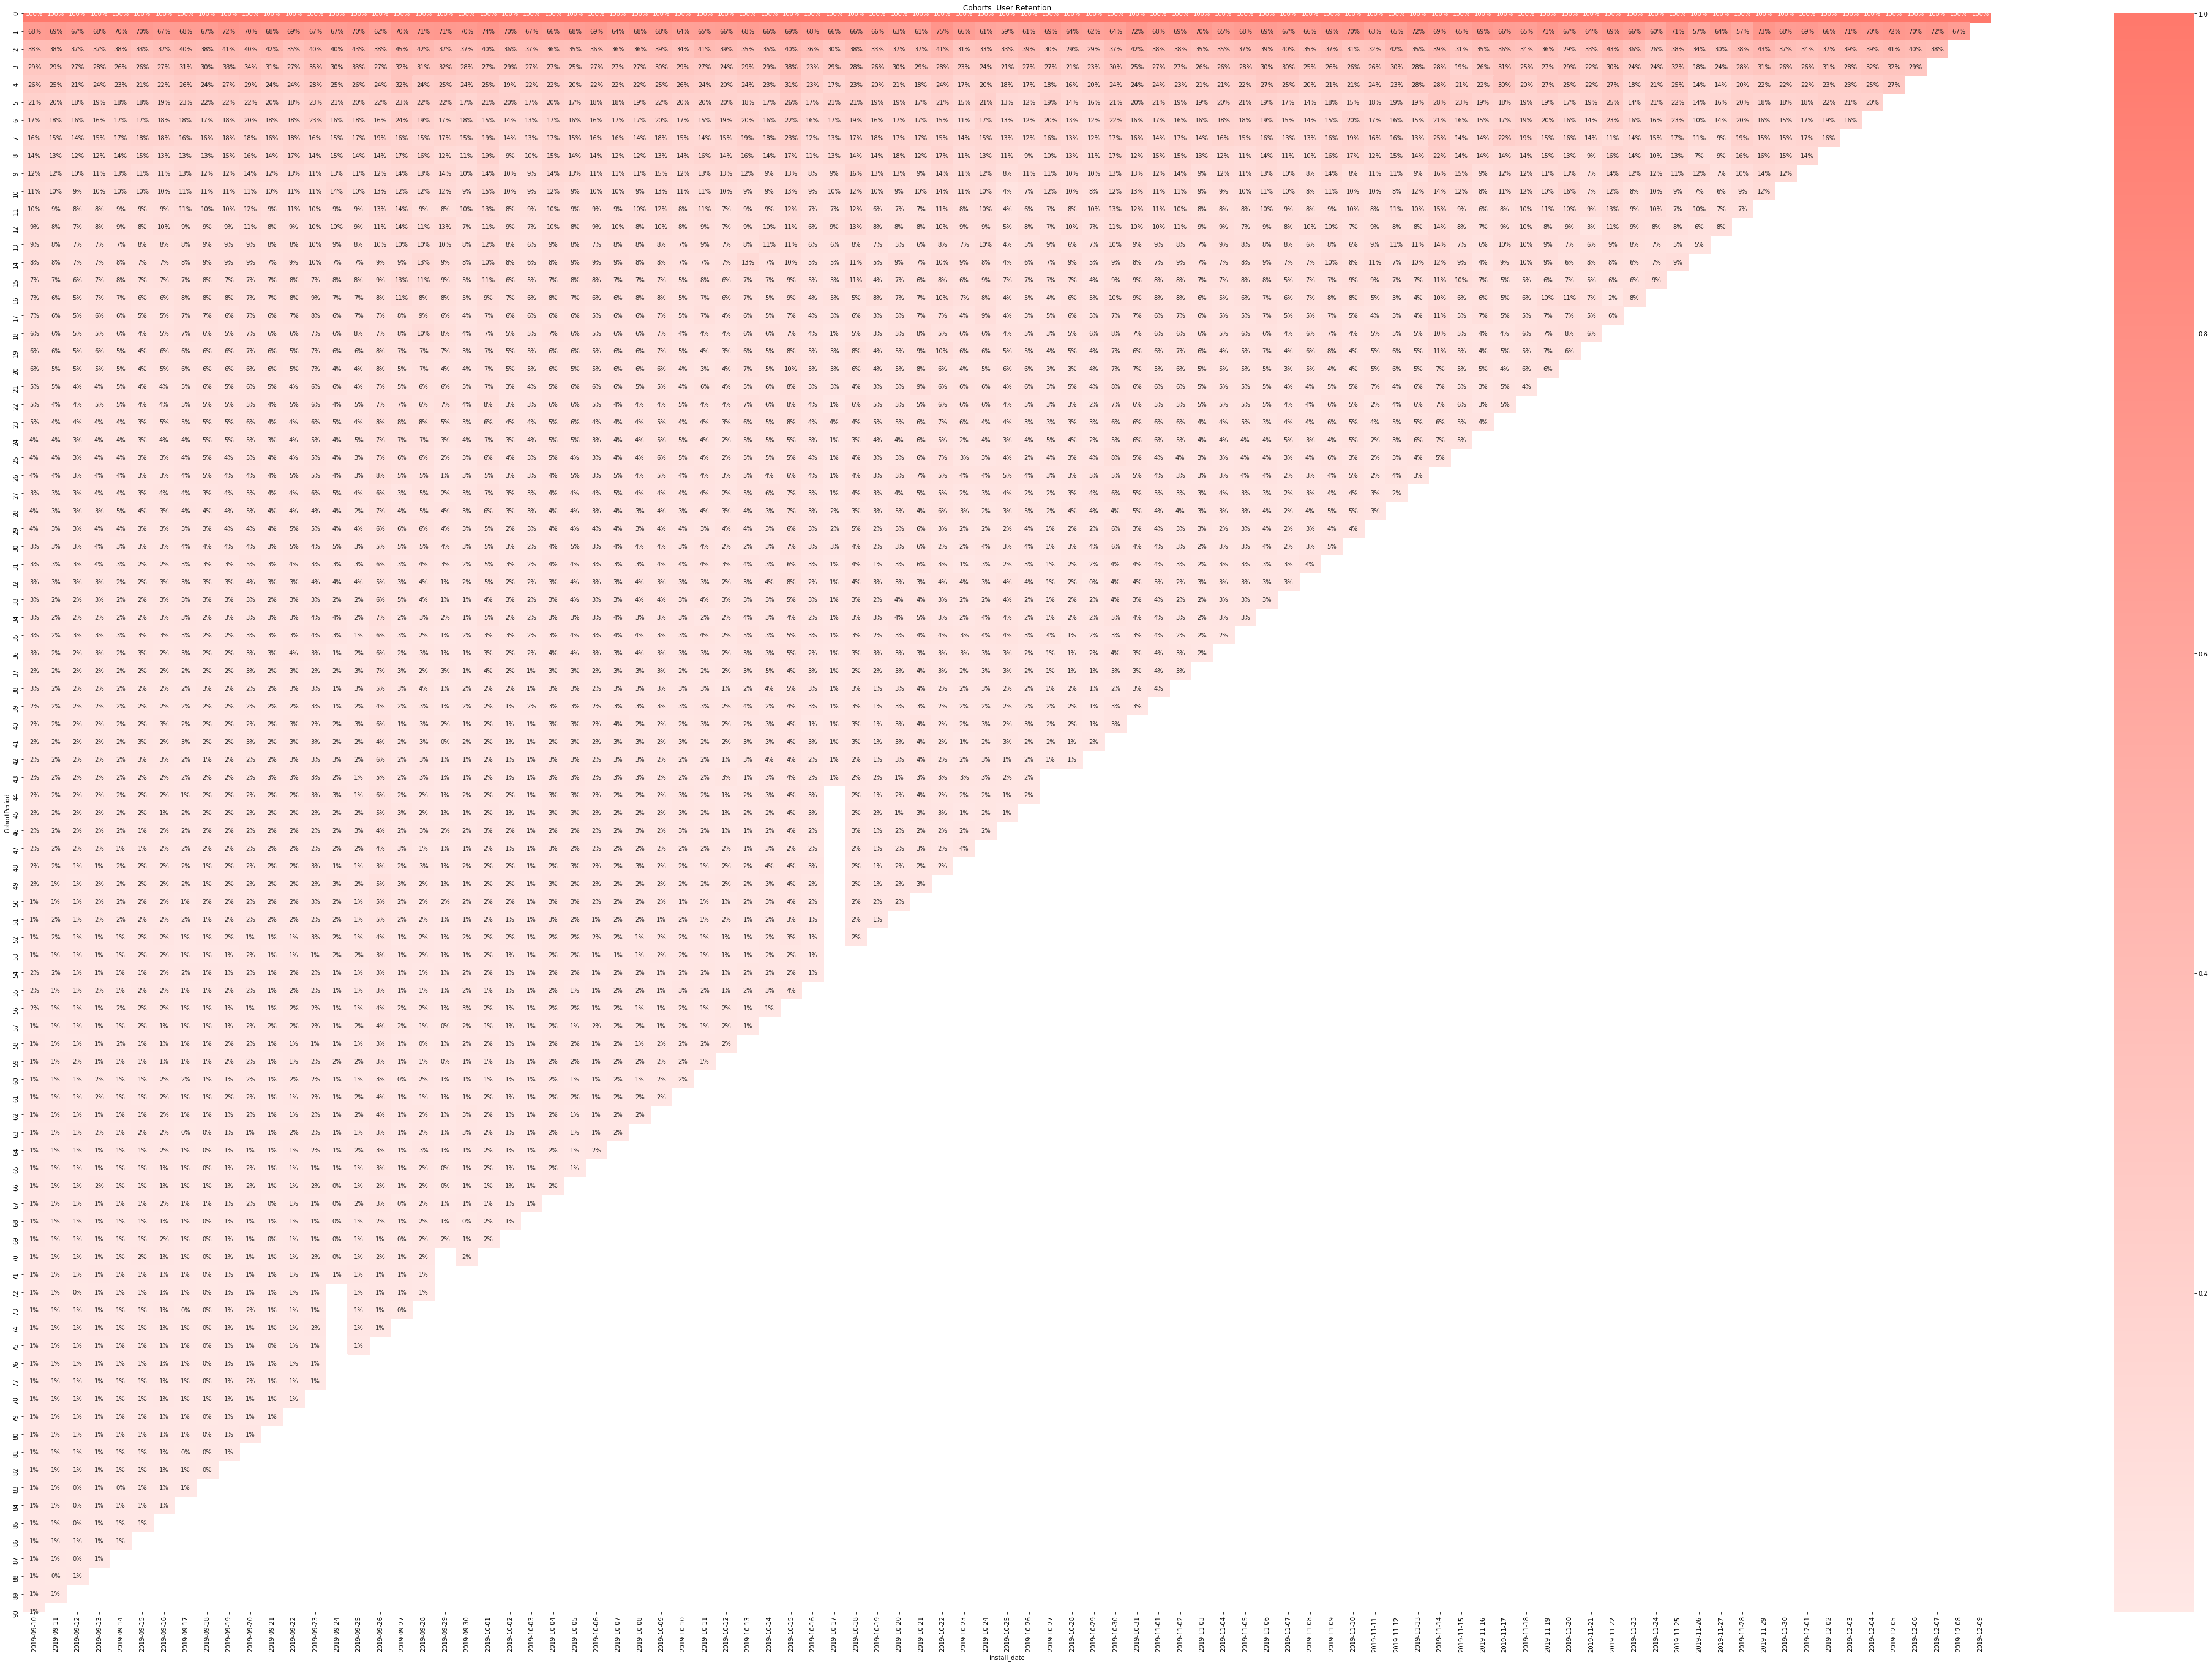

In [15]:
#show the retention rates
import seaborn as sns
colormap=sns.light_palette("#ff796c",as_cmap=True, reverse=False)

plt.figure(figsize=(72,48))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);

In [16]:
#Calculate avg retention rates to use in lifetime prediction
Retention=user_retention.mean().to_frame(name='Retention').reset_index()
Retention

,CohortPeriod,Retention
0,0,1.00
1,1,0.67
2,2,0.37
3,3,0.28
4,4,0.23
...,...,...
86,86,0.01
87,87,0.01
88,88,0.01
89,89,0.01


In [17]:
#export results
Retention.to_excel (r'C:\Users\Snow\Desktop\sa_data_test\NoDanger.xlsx', index = True, header=True)